In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [122]:
#Importation des données
df_phishing_detection = pd.read_csv('../Data/Phishing_Detection_Dataset.csv')
df_phishing_predict = pd.read_csv('../Data/Phishing_dataset_predict.csv')

df = pd.concat([df_phishing_detection, df_phishing_predict], axis=0,ignore_index=True)

#Suppresion des doublons
df = df[~df.duplicated()]
#Suppresion des lignes contenant un null
df = df.dropna()

# print(df_phishing_detection.head())
# print(df_phishing_predict.head())
# print(df.head())

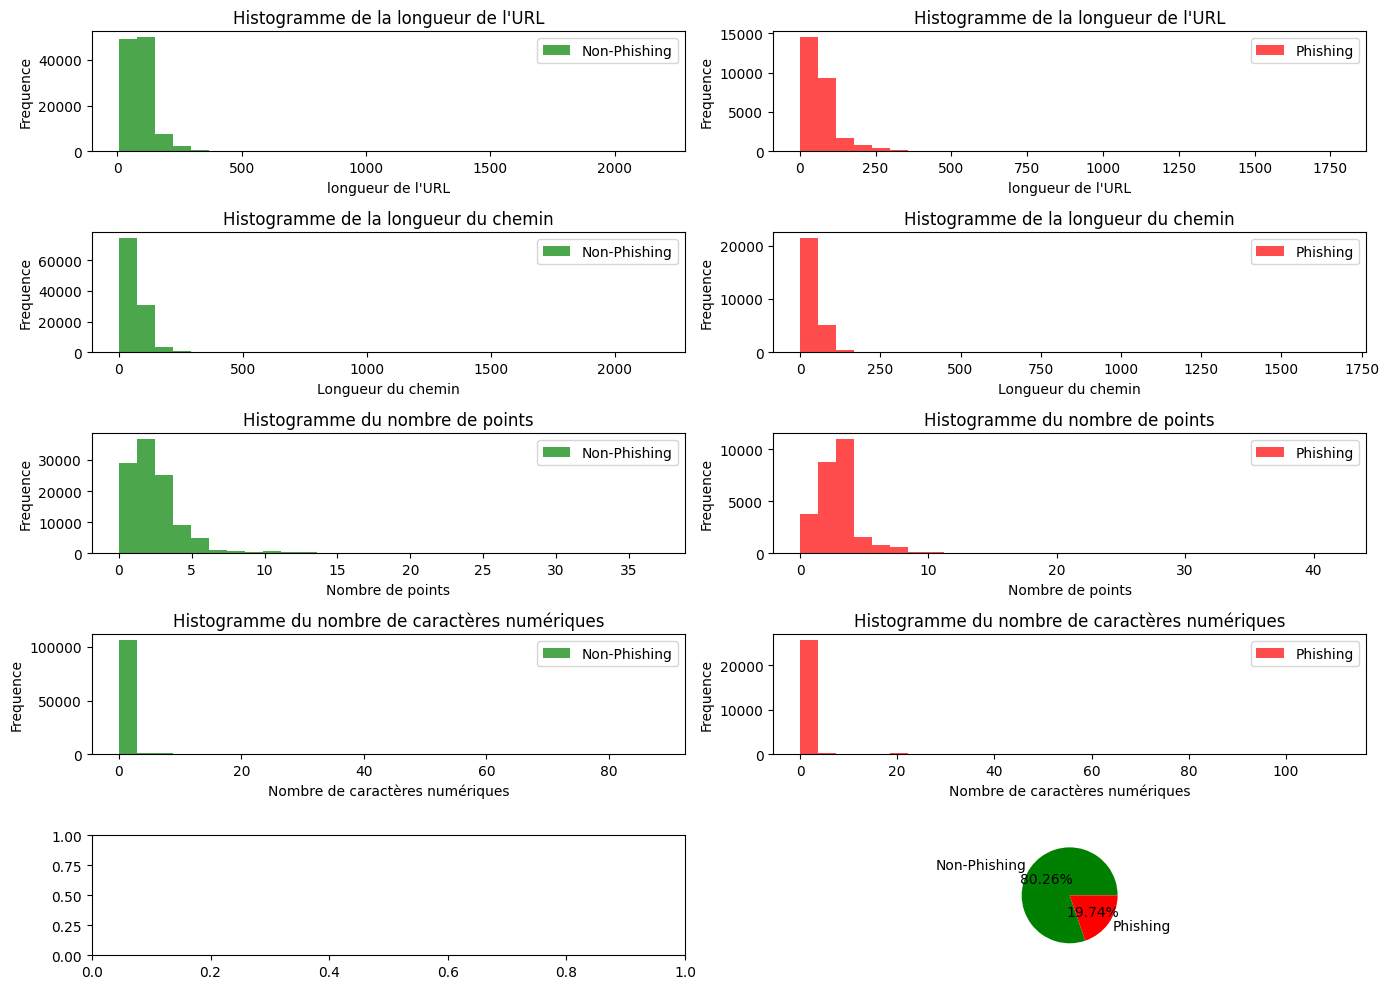

In [123]:
#Présentation des données
phishing_data = df[df['Phishing'] == 1.0]
non_phishing_data = df[df['Phishing'] < 1]

fig, axs = plt.subplots(5, 2, figsize=(14, 10))

# Histogramme de la longueur de l'URL
axs[0, 0].hist(non_phishing_data['UrlLength'], bins=30, alpha=0.7, label='Non-Phishing', color='green')
axs[0, 0].set_title("Histogramme de la longueur de l'URL")
axs[0, 0].set_xlabel("longueur de l'URL")
axs[0, 0].set_ylabel('Frequence')
axs[0, 0].legend()

axs[0, 1].hist(phishing_data['UrlLength'], bins=30, alpha=0.7, label='Phishing', color='red')
axs[0, 1].set_title("Histogramme de la longueur de l'URL")
axs[0, 1].set_xlabel("longueur de l'URL")
axs[0, 1].set_ylabel('Frequence')
axs[0, 1].legend()

# Histogramme de la longueur du chemin
axs[1, 0].hist(non_phishing_data['PathLength'], bins=30, alpha=0.7, label='Non-Phishing', color='green')
axs[1, 0].set_title('Histogramme de la longueur du chemin')
axs[1, 0].set_xlabel('Longueur du chemin')
axs[1, 0].set_ylabel('Frequence')
axs[1, 0].legend()

axs[1, 1].hist(phishing_data['PathLength'], bins=30, alpha=0.7, label='Phishing', color='red')
axs[1, 1].set_title('Histogramme de la longueur du chemin')
axs[1, 1].set_xlabel('Longueur du chemin')
axs[1, 1].set_ylabel('Frequence')
axs[1, 1].legend()

# Histogramme du nombre de points
axs[2, 0].hist(non_phishing_data['NumDots'], bins=30, alpha=0.7, label='Non-Phishing', color='green')
axs[2, 0].set_title('Histogramme du nombre de points')
axs[2, 0].set_xlabel('Nombre de points')
axs[2, 0].set_ylabel('Frequence')
axs[2, 0].legend()

axs[2, 1].hist(phishing_data['NumDots'], bins=30, alpha=0.7, label='Phishing', color='red')
axs[2, 1].set_title('Histogramme du nombre de points')
axs[2, 1].set_xlabel('Nombre de points')
axs[2, 1].set_ylabel('Frequence')
axs[2, 1].legend()

# Histogramme du nombre de caractères numériques
axs[3, 0].hist(non_phishing_data['NumNumericChars'], bins=30, alpha=0.7, label='Non-Phishing', color='green')
axs[3, 0].set_title('Histogramme du nombre de caractères numériques')
axs[3, 0].set_xlabel('Nombre de caractères numériques')
axs[3, 0].set_ylabel('Frequence')
axs[3, 0].legend()

axs[3, 1].hist(phishing_data['NumNumericChars'], bins=30, alpha=0.7, label='Phishing', color='red')
axs[3, 1].set_title('Histogramme du nombre de caractères numériques')
axs[3, 1].set_xlabel('Nombre de caractères numériques')
axs[3, 1].set_ylabel('Frequence')
axs[3, 1].legend()

df.groupby('Phishing').size().plot(kind='pie', autopct='%.2f%%', labels=['Non-Phishing', 'Phishing'], colors=['green', 'red'])

plt.tight_layout()
plt.show()

In [124]:
#Analyse des données
#print(df.info())
#print(df.describe())
print(df['PathLength'].describe())

count    136526.000000
mean         55.340243
std          41.686519
min           0.000000
25%          26.000000
50%          46.000000
75%          76.000000
max        2175.000000
Name: PathLength, dtype: float64


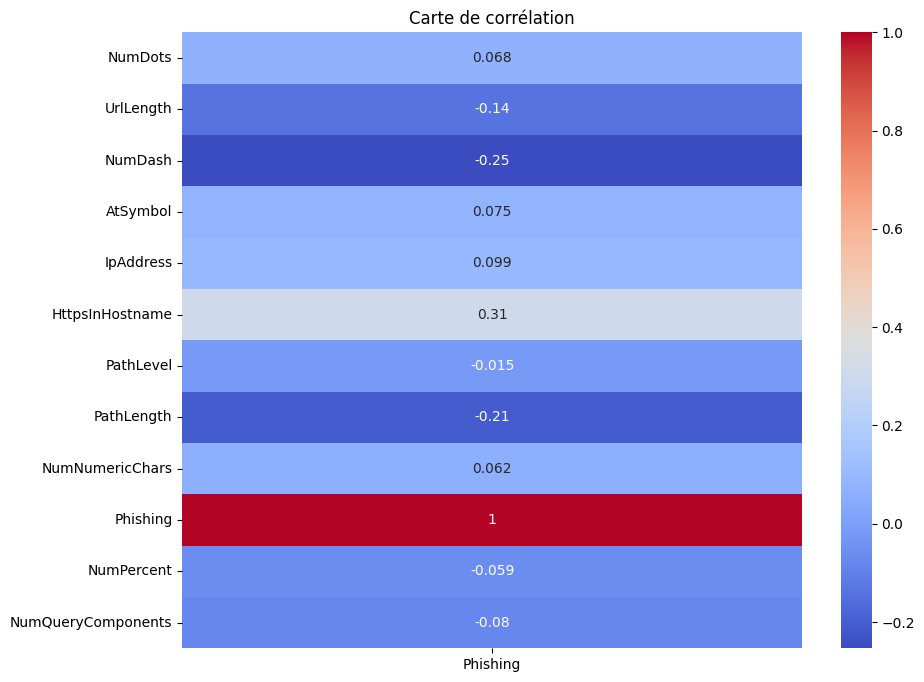

In [125]:
#Analyse corrélation des données
correlation_matrix = df.corr()

x = correlation_matrix[['Phishing']]
plt.figure(figsize=(10, 8))
sns.heatmap(x, annot=True, cmap='coolwarm')
plt.title('Carte de corrélation')
plt.show()

In [126]:
#Identification des caractéristiques importantes

#Supposons que toutes les colonnes sauf 'Phising' soient des caractéristiques et 'Phising' la cible
X = df.drop(columns=['Phishing'])
y = df['Phishing'].dropna()

# #Remplir les valeurs manquantes de y avec une valeur courante (comme la moyenne ou la médiane)
# y = y.fillna(y.median())

#Sélection des caractéristiques les plus importantes
selector = SelectKBest(score_func=chi2, k='all').fit(X, y)
X_transformed = selector.transform(X)
X = X[[val for i,val in enumerate(X.columns) if selector.get_support()[i]]]
print(X)

         NumDots  UrlLength  NumDash  AtSymbol  IpAddress  HttpsInHostname  \
662591         3         72        0         0          0                0   
662592         3        144        0         0          0                0   
662593         3         58        0         0          0                0   
662594         3         79        1         0          0                0   
662595         3         46        0         0          0                0   
...          ...        ...      ...       ...        ...              ...   
1325154        3         57        1         0          0                0   
1325155        3         77        0         0          0                0   
1325159        3         56        0         0          0                0   
1325166        2         60        3         0          0                0   
1325168        2         61        2         0          0                0   

         PathLevel  PathLength  NumNumericChars  NumPercent  \
